### Examen módulo I
* Conjunto de datos: [Clasificación de tejidos cancerígenos](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

##### Preparación

In [1]:
# Importar librerías de análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definir un tema para graficar
sns.set_style('whitegrid')

##### Preprocesamiento

In [4]:
# Abrir el archivo
df = pd.read_csv('data.csv', header=0)
df.shape

(569, 33)

In [5]:
# Ver las primeras filas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Ver la información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Convertir la columna "id" en índice
df.set_index('id', inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
# Eliminar la última columna
df.drop('Unnamed: 32', axis=1, inplace=True)
df.shape

(569, 31)

In [9]:
# Contar el número de valores nulos por variable
df.columns[df.isna().any()].tolist()

[]

In [10]:
# Ver el conteo por clase
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

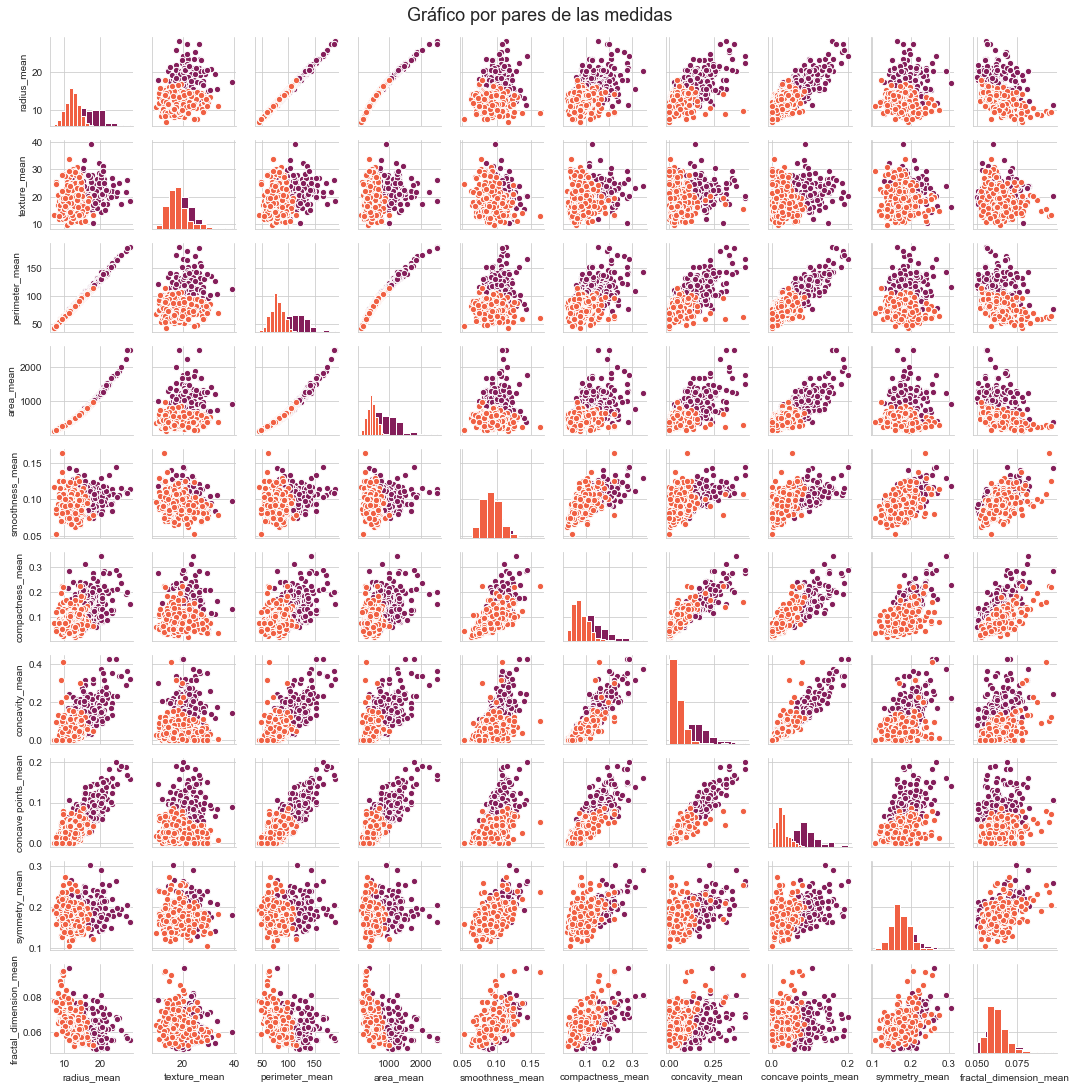

In [11]:
# Dibujar un gráfico de pares
g = sns.PairGrid(df.iloc[:, 0:11], hue='diagnosis', height=1.5, palette='rocket')
g = g.map_diag(plt.hist, edgecolor='w')
g = g.map_offdiag(plt.scatter, edgecolor='w', s=40)
g = g.fig.suptitle('Gráfico por pares de las medidas', y=1.01, fontsize=18)
plt.show();

In [12]:
# Crear la matriz de correlación
cor_matrix = df.corr()

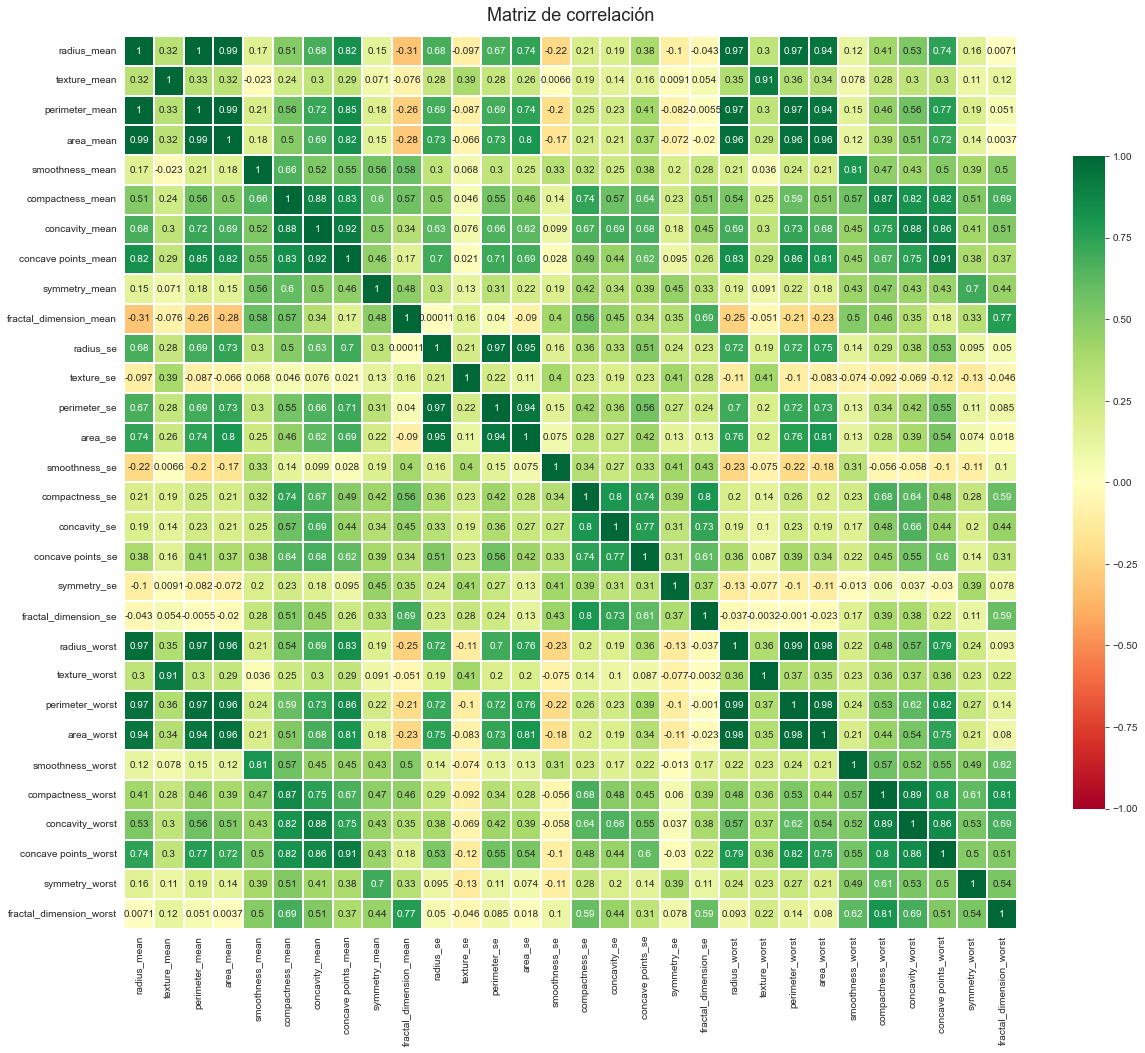

In [13]:
# Graficar la matriz de correlación
# corr.style.background_gradient(cmap='RdYlGn')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=cor_matrix, linewidths=0.3, square=True, cmap='RdYlGn', annot=True, vmax=1, vmin=-1, center=0, cbar_kws={'shrink': 0.6}, ax=ax)
ax.set_title('Matriz de correlación', fontdict={'fontsize':18}, pad=15)
plt.show()

In [14]:
# Listar las columnas más correladas
cor_matrix = cor_matrix.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [15]:
# Eliminar las columnas correlacionadas
df = df.drop(to_drop, axis=1)

Se eliminaron las columnas: *perimeter_mean, area_mean, perimeter_se, area_se, radius_worst, perimeter_worst* y *area_worst* por estar altamente correlacionadas.

In [16]:
# Recodificar la variable de etiquetas
df['diagnosis'] = np.where(df['diagnosis'] == "M", 1, 0)

In [17]:
# Separar en características (X) y etiquetas (Y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [18]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape[0], X_test.shape[0]

(426, 143)

In [19]:
# Definir función para escalar
from sklearn.preprocessing import MinMaxScaler

def NormScaler(train_set, test_set):
    scaler = MinMaxScaler().fit(train_set)
    train_set_norm = pd.DataFrame(scaler.transform(train_set), columns=train_set.columns)
    test_set_norm = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)
    return train_set_norm, test_set_norm

In [20]:
# Estandarizar los conjuntos
X_train_norm, X_test_norm = NormScaler(X_train, X_test)

##### Ajustar diferentes modelos

In [21]:
# Entrenar los modelos
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    'Perceptron': Perceptron(random_state=101),
    'DecTree': DecisionTreeClassifier(random_state=101),
    'LogReg': LogisticRegression(random_state=101) 
}

for name, model in classifiers.items():
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    score = round(accuracy_score(y_test, y_pred)*100, 2)
    print(f'Precisión del modelo {model}: {score}%'.format(model, score))

Precisión del modelo Perceptron(random_state=101): 86.01%
Precisión del modelo DecisionTreeClassifier(random_state=101): 90.21%
Precisión del modelo LogisticRegression(random_state=101): 95.8%


De entre los tres modelos con los parámetros por defecto, el mejor modelo fue la **regresión logística**. 

In [22]:
# Definir una malla de parámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 100),
}

In [23]:
# Buscar los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(solver='liblinear', random_state=101)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid.fit(X_train_norm, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [24]:
# Ver el resultado del mejor modelo
print('Precisión: %.2f%%' % (grid.best_score_*100))
print(grid.best_params_)

Precisión: 97.43%
{'C': 2.782559402207126, 'penalty': 'l1'}


##### Entrenar el mejor modelo

In [25]:
# Entrenar el modelo
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear', penalty='l1', C=2.7826, random_state=101)
clf.fit(X_train_norm, y_train)

LogisticRegression(C=2.7826, penalty='l1', random_state=101, solver='liblinear')

In [26]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

y_pred = clf.predict(X_test_norm)
print('Precisión: %.2f%%' % (accuracy_score(y_test, y_pred)*100))
print('Puntuación F1: %.2f%%' % (f1_score(y_test, y_pred)*100))
print('Precisión balanceada: %.2f%%' % (balanced_accuracy_score(y_test, y_pred)*100))

Precisión: 96.50%
Puntuación F1: 95.50%
Precisión balanceada: 96.48%


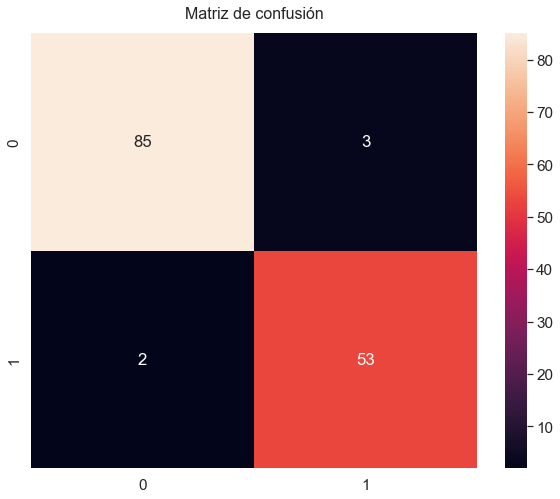

In [27]:
# Graficar la matriz de confusión
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.4)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='rocket')
ax.set_title('Matriz de confusión', fontdict={'fontsize':16}, pad=15)
plt.show()

In [28]:
# Guardar los coeficientes
# coef = pd.DataFrame(zip(X.columns, np.transpose(clf.coef_)), columns=['features', 'coef'])
coef = pd.Series(np.squeeze(np.transpose(clf.coef_)), index=X.columns)
coef.sort_values(ascending=False)

radius_se                  14.482616
concave points_worst       10.329212
texture_worst               7.423343
radius_mean                 7.123562
concave points_mean         5.671858
symmetry_worst              2.089739
smoothness_worst            1.323443
concavity_worst             0.593949
concavity_se                0.000000
compactness_worst           0.000000
fractal_dimension_se        0.000000
symmetry_se                 0.000000
fractal_dimension_worst     0.000000
texture_mean                0.000000
smoothness_se               0.000000
symmetry_mean               0.000000
concavity_mean              0.000000
compactness_mean            0.000000
smoothness_mean             0.000000
concave points_se          -0.048216
texture_se                 -0.291629
compactness_se             -2.807437
fractal_dimension_mean     -2.894090
dtype: float64

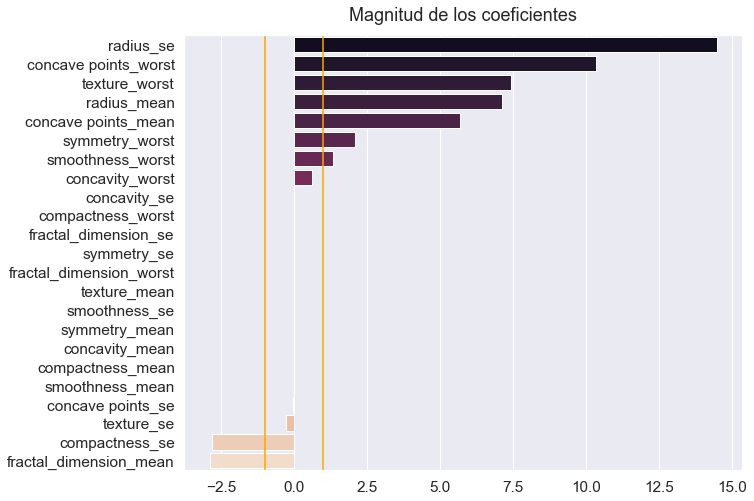

In [29]:
# Graficar la magnitud de los coeficientes
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=coef.values, y=coef.index, ax=ax, order=coef.sort_values(ascending=False).index, palette='rocket')
ax.set_title('Magnitud de los coeficientes', fontdict={'fontsize':18}, pad=15)
ax.axvline(-1, color='orange')
ax.axvline(1, color='orange');

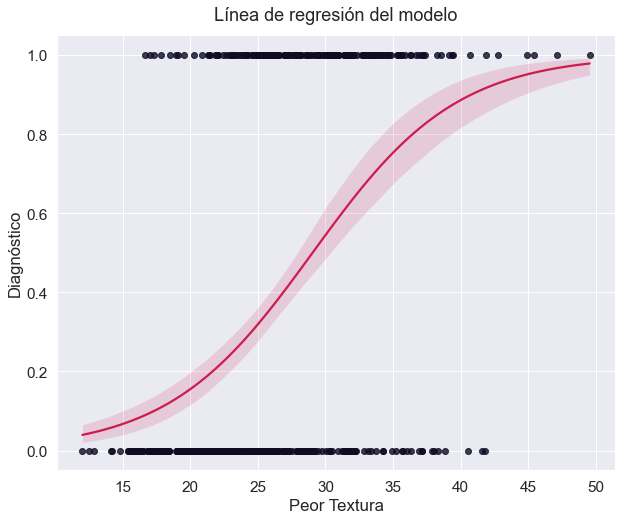

In [30]:
# Graficar la curva de regresión de un coeficiente
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='texture_worst', y='diagnosis', data=df, logistic=True, ax=ax, scatter_kws={'color': '#0E0B22'}, line_kws={'color': '#CD1C4E'})
ax.set_title('Línea de regresión del modelo', fontdict={'fontsize':18}, pad=15)
ax.set_xlabel('Peor Textura')
ax.set_ylabel('Diagnóstico');

c:\Users\frpm0\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


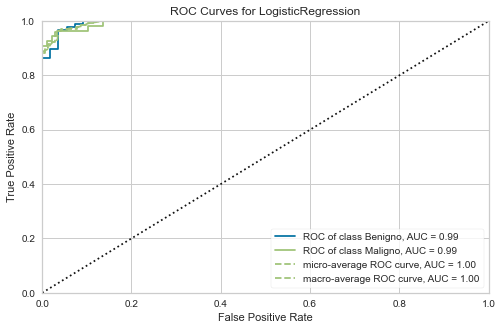

In [31]:
# Graficar la curva ROC
from yellowbrick import ROCAUC

fig, ax = plt.subplots(figsize=(8, 5))
visualizer = ROCAUC(clf, classes=['Benigno', 'Maligno'], ax=ax)
visualizer.fit(X_train_norm, y_train)
visualizer.score(X_test_norm, y_test)
visualizer.show();